## Financial correlation calculation


Correlation matrix for financials.

Inputs: Yahoo finance ticker symbols

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns


def load_df(tickers, start, end, interval):
    data_df = yf.download(tickers,
                          start = start,
                          end = end,
                          interval = interval,
                          progress = False)

    # Drop any NaNs (e.g. when comparing SPY to BTC-USD)
    data_df = data_df.dropna()
    
    return data_df


def plot_tickers(data_df, tickers, track, log_plot, normalize):

    # normalize df
    if normalize == True:
        data_df = (data_df-data_df.mean())/data_df.std()
    else:
        pass
    
    # Plot tickers
    ticker_list = tickers.split(' ')
    
    for ticker in ticker_list:
        if ticker == 'BTC-USD':  # put BTC on right axis
            ax = data_df[track, ticker].plot(secondary_y=True, figsize=(14,10), legend=True, logy=log_plot, grid=True)
        else:
            ax = data_df[track, ticker].plot(figsize=(14,10), legend=True, logy=log_plot, grid=True)
    
    ax.get_legend().set_bbox_to_anchor((1.3,1))


def calc_correlation(data_df, track):
    # Get correlation and sort by sum
    sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values
    
    corr_matrix = data_df[track][sum_corr].corr()

    # creating mask
    mask = np.triu(np.ones_like(corr_matrix))

    # plot correlations
    plt.figure(figsize=(13,8))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(corr_matrix,
                     square = True,
                     annot=True,
                     cmap='YlGnBu')
                     # mask=mask)

    # Align y tick labels
    for label in (ax.get_yticklabels()):
        label.set_verticalalignment('center')

    sns.reset_orig()
    

In [2]:
'''Change inputs here'''

# Enter tickers to plot/compare:
tickers = 'BTC-USD ETH-USD SPY MSFT PYPL SQ'

# Timeframe:
start = '2021-07-01'
end = '2021-12-31'

# Time interval: can be 1m, 1h, 1d
interval = '1d'

# key to track: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
track = 'Close'

# plot options:
log_plot = False
normalize = True

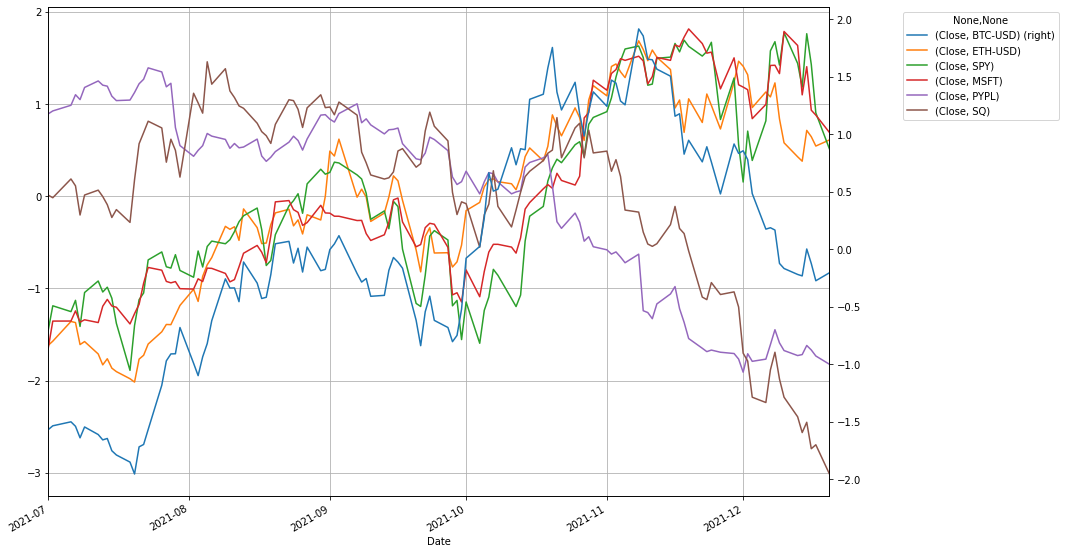

In [3]:
# plot trends
# data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)

data_df = load_df(tickers, start, end, interval)

# OPTIONAL: Apply a shift to column
# data_df['Close', 'BTC-USD'] = data_df['Close', 'BTC-USD'].shift(periods=5, fill_value=0)
# data_df.head()

plot_tickers(data_df, tickers, track, log_plot, normalize)

plt.savefig('chart.png', bbox_inches='tight')

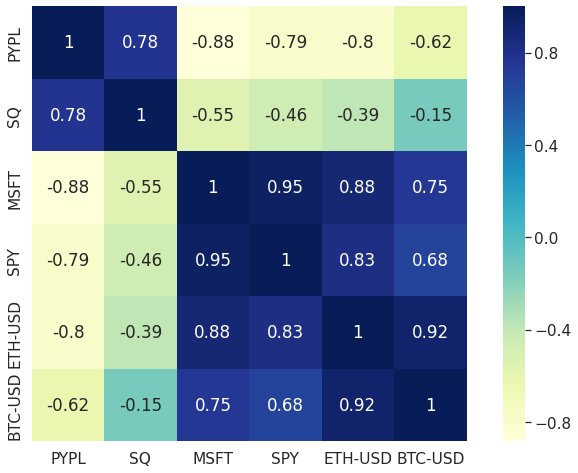

In [4]:
# calculate and plot correlations
calc_correlation(data_df, track)

plt.savefig('corr_matrix.png', bbox_inches='tight')